In [1]:
#Importing Libraries

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [47]:
#Importing dataset

In [48]:
dataset=pd.read_csv('C:\\Users\\BizAct-110\\OneDrive\\ML_Practice\\Regression\\SupportVectorRegression\\Position_Salaries.csv')
x=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values

In [49]:
dataset.head()


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [50]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [51]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [52]:
y=y.reshape(len(y),1)# changing to 2-D array
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [53]:
#Feature Scaling

In [54]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y)

In [55]:
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [56]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [57]:
#Train the svr model on the whole dataset

In [58]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(x,y)

C:\Users\BizAct-110\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [59]:
#Predicting new result

In [60]:
# to get predicted salry in original range
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))
                       

array([170370.0204065])

In [61]:
#Vizualizing the Support Vector Regression Result

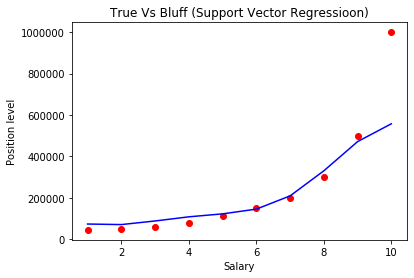

In [62]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='red')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x)),color='blue')
plt.title('True Vs Bluff (Support Vector Regressioon)')
plt.xlabel('Salary')
plt.ylabel('Position level')
plt.show()

In [63]:
#Vizualizing the SVR result( for higher resolution and smoother curve)

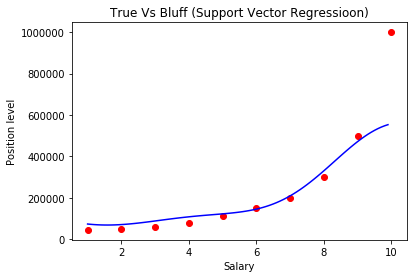

In [65]:
x_grid=np.arange(min(sc_x.inverse_transform(x)),max(sc_x.inverse_transform(x)),0.1)
x_grid=x_grid.reshape(len(x_grid),1)
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='red')
plt.plot(x_grid,sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid))),color='blue')
plt.title('True Vs Bluff (Support Vector Regressioon)')
plt.xlabel('Salary')
plt.ylabel('Position level')
plt.show()